<a href="https://www.kaggle.com/code/fionaanggilia/viskom-week-05?scriptVersionId=284074647" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

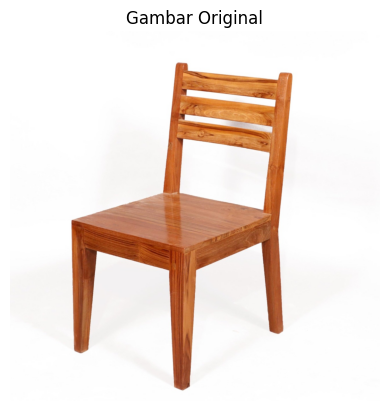

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Asumsi path ini sudah benar. Jika belum, ganti sesuai path gambar kursi Anda.
path_gambar = '/kaggle/input/viskom-week-5/week05/data/kursi.jpg' 

# 1. Baca Gambar (tetap pakai OpenCV)
img = cv2.imread(path_gambar) 

# 2. KONVERSI WARNA: OpenCV membaca gambar sebagai BGR, Matplotlib sebagai RGB.
# Jika tidak dikonversi, warna gambar akan terlihat aneh (kebiru-biruan).
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3. Tampilkan dengan Matplotlib
plt.imshow(img_rgb)
plt.title("Gambar Original")
plt.axis('off') # Opsional: menghilangkan sumbu koordinat
plt.show()

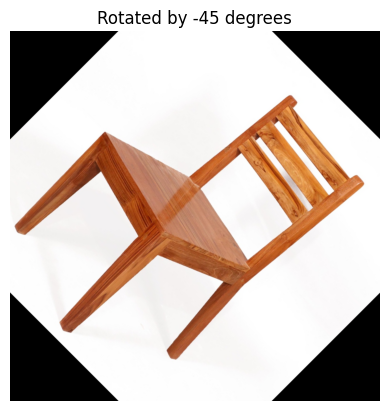

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # Import Matplotlib untuk menampilkan gambar

def rotasi(derajat=0.0):
    # Ganti path ini dengan path lengkap yang sudah Anda temukan!
    path_benar = '/kaggle/input/viskom-week-5/week05/data/kursi.jpg'
    img = cv2.imread(path_benar)

    if img is None:
        print("GAGAL MEMUAT GAMBAR. Cek path file.")
        return

    (h, w) = img.shape[:2]
    center = (w//2, h//2)
    scale = 1.0

    # 1. Menghitung Matriks Rotasi
    M = cv2.getRotationMatrix2D(center, derajat, scale)
    
    # 2. Menerapkan Transformasi Afinitas
    rotated = cv2.warpAffine(img, M, (w, h))

    # --- Tampilan dengan Matplotlib (Ganti cv2.imshow) ---
    
    # Konversi dari BGR (OpenCV) ke RGB (Matplotlib)
    rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)
    
    plt.imshow(rotated_rgb)
    plt.title(f"Rotated by {derajat} degrees")
    plt.axis('off')
    plt.show()


if __name__ == '__main__':
    # Memutar kursi 45 derajat berlawanan arah jarum jam
    rotasi(-45)

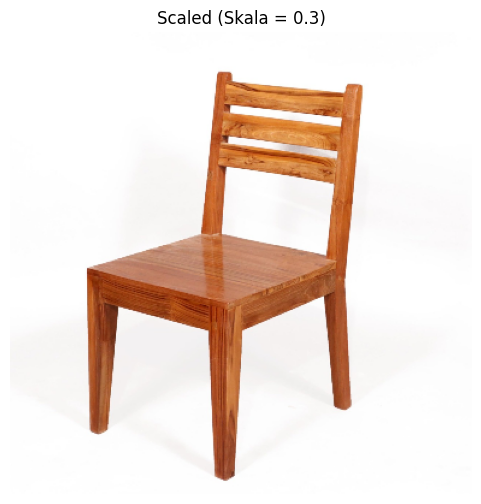

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # PENTING: Untuk menampilkan gambar di Kaggle

def scale(skala=0.3): # Gunakan skala default 0.3 (diperkecil)
    # GANTI PATH INI DENGAN PATH LENGKAP YANG SUDAH BERHASIL
    path_benar = '/kaggle/input/viskom-week-5/week05/data/kursi.jpg' 
    img = cv2.imread(path_benar)

    if img is None:
        print("GAGAL MEMUAT GAMBAR. Periksa path file:", path_benar)
        return

    # Menerapkan scaling (perkalian skala)
    scaled = cv2.resize(img, None, fx=skala, fy=skala, interpolation=cv2.INTER_LINEAR)
    
    # --- Ganti cv2.imshow() dengan Matplotlib ---
    
    # Konversi dari BGR (OpenCV) ke RGB (Matplotlib)
    scaled_rgb = cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6, 6)) # Atur ukuran plot agar tidak terlalu besar/kecil
    plt.imshow(scaled_rgb)
    plt.title(f"Scaled (Skala = {skala})")
    plt.axis('off')
    plt.show()


if __name__ == '__main__':
    scale(skala=0.3) # Contoh: Memperkecil gambar menjadi 30%

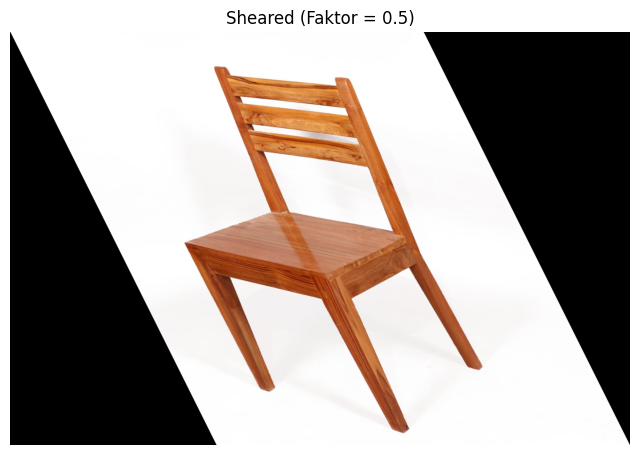

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # PENTING: Import Matplotlib untuk display di Kaggle

def shear(shear_factor=0.5): # Menggunakan shear_factor default 0.5
    # GANTI PATH INI DENGAN PATH LENGKAP YANG SUDAH BERHASIL
    path_benar = '/kaggle/input/viskom-week-5/week05/data/kursi.jpg' 
    img = cv2.imread(path_benar)

    if img is None:
        print("GAGAL MEMUAT GAMBAR. Periksa path file:", path_benar)
        return

    (h, w) = img.shape[:2]
    
    # Matriks Shearing (horizontal)
    # [ 1, shear_factor, 0 ]
    # [ 0, 1, 0 ]
    M = np.float32([[1, shear_factor, 0],
                    [0, 1, 0]])

    # cv2.warpAffine membutuhkan ukuran output yang lebih besar jika ada shearing
    # Lebar baru = Lebar asli + (faktor shear * Tinggi)
    new_width = int(w + shear_factor * h) 
    sheared = cv2.warpAffine(img, M, (new_width, h))
    
    # --- Ganti cv2.imshow() dengan Matplotlib ---
    
    # Konversi dari BGR (OpenCV) ke RGB (Matplotlib)
    sheared_rgb = cv2.cvtColor(sheared, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(sheared_rgb)
    plt.title(f"Sheared (Faktor = {shear_factor})")
    plt.axis('off')
    plt.show()


if __name__ == '__main__':
    # Contoh: Miringkan gambar ke kanan
    shear(shear_factor=0.5)

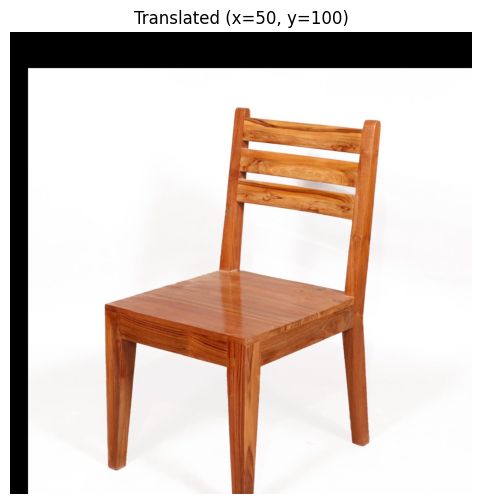

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # PENTING: Import Matplotlib untuk display di Kaggle

def translasi(tx=50, ty=100):
    # GANTI PATH INI DENGAN PATH LENGKAP YANG SUDAH BERHASIL
    path_benar = '/kaggle/input/viskom-week-5/week05/data/kursi.jpg' 
    img = cv2.imread(path_benar)

    if img is None:
        print("GAGAL MEMUAT GAMBAR. Periksa path file:", path_benar)
        return

    # Nilai perpindahan (x: 50 ke kanan, y: 100 ke bawah)
    # tx, ty = 50, 100 
    
    # Matriks Translasi T
    # [ 1, 0, tx ]
    # [ 0, 1, ty ]
    T = np.float32([[1, 0, tx],
                    [0, 1, ty]])

    # Terapkan Transformasi Afinitas: 
    # cv2.warpAffine membutuhkan (img, Matriks_T, Ukuran_Output)
    # Ukuran Output dipertahankan sama dengan ukuran gambar asli
    translated = cv2.warpAffine(img, T, (img.shape[1], img.shape[0]))
    
    # --- Ganti cv2.imshow() dengan Matplotlib ---
    
    # Konversi dari BGR (OpenCV) ke RGB (Matplotlib)
    translated_rgb = cv2.cvtColor(translated, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(translated_rgb)
    plt.title(f"Translated (x={tx}, y={ty})")
    plt.axis('off')
    plt.show()


if __name__ == '__main__':
    # Contoh: Menggeser gambar 50 pixel ke kanan dan 100 pixel ke bawah
    translasi(tx=50, ty=100)